# Sentiment analysis LAST MONTH
The script aims to explore the datasets

- Sentiment_first.csv ("datasets/sentiment_chatgptfirst.csv")

### TO-DO:
use negative and positive tweets. discard neutral. there are too many neutrals. 
Section for negative (frequence, frequent words, topic)
Section for positive (''')

### Sentiment_chatgptfirst analysis 

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/csm/

/content/drive/MyDrive/csm


In [ ]:
#load data
import pandas as pd

df = pd.read_csv('sentiment_last.csv')
df.head()

,Unnamed: 0,user_name,user_description,tweets,clean_tweets,label,date
0,91172,jonas bina,android developer like learning,"🚀 6 days ago, I started my blog with ChatGPT a...",day ago started blog chatgpt ive hit view read...,positive,2023-04-01 00:00:01+00:00
1,91173,medigy,medigythe perfect platform fhir enthusiast sha...,A @Forbes article brief: @Microsoft's @NuanceI...,forbes article brief microsofts nuanceinc expr...,positive,2023-04-01 00:00:01+00:00
2,91171,hindustan time,india largest medium company latest news world...,#Italy's privacy watchdog said it had blocked ...,italy privacy watchdog said blocked controvers...,negative,2023-04-01 00:00:02+00:00
3,91170,daily utah chronicle,university utah independent student voice foll...,ChatGPT is transforming higher education by of...,chatgpt transforming higher education offering...,positive,2023-04-01 00:00:15+00:00
4,91169,chatgpt,chatgpt plus,My heart beats for you. #ChatGPT https://t.co/...,heart beat you chatgpt,positive,2023-04-01 00:00:18+00:00


In [ ]:
bots = df.groupby("user_name").size().sort_values(ascending=False).reset_index(name = "n")
bots = bots.loc[bots.n >= 60]
bots = list(bots["user_name"])

In [ ]:
df = df[~df['user_name'].isin(bots)]

In [ ]:
#sort tweets by date
df_sorted = df.sort_values(by='date')

In [ ]:
df_sorted.date = pd.to_datetime(df_sorted.date)

In [ ]:
df_sorted.date

0       2023-04-01 00:00:01+00:00
1       2023-04-01 00:00:01+00:00
2       2023-04-01 00:00:02+00:00
3       2023-04-01 00:00:15+00:00
9       2023-04-01 00:00:23+00:00
                   ...           
91169   2023-04-26 14:38:13+00:00
91170   2023-04-26 14:39:10+00:00
91171   2023-04-26 14:39:24+00:00
91172   2023-04-26 14:40:11+00:00
91173   2023-04-26 14:43:34+00:00
Name: date, Length: 74136, dtype: datetime64[ns, UTC]

In [ ]:
#sort tweets by week
df_sorted['week'] = df_sorted.date.dt.week

<ipython-input-13-4fb373ebafa2>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_sorted['week'] = df_sorted.date.dt.week


In [ ]:
df_sorted

,Unnamed: 0,user_name,user_description,tweets,clean_tweets,label,date,week
0,91172,jonas bina,android developer like learning,"🚀 6 days ago, I started my blog with ChatGPT a...",day ago started blog chatgpt ive hit view read...,positive,2023-04-01 00:00:01+00:00,13
1,91173,medigy,medigythe perfect platform fhir enthusiast sha...,A @Forbes article brief: @Microsoft's @NuanceI...,forbes article brief microsofts nuanceinc expr...,positive,2023-04-01 00:00:01+00:00,13
2,91171,hindustan time,india largest medium company latest news world...,#Italy's privacy watchdog said it had blocked ...,italy privacy watchdog said blocked controvers...,negative,2023-04-01 00:00:02+00:00,13
3,91170,daily utah chronicle,university utah independent student voice foll...,ChatGPT is transforming higher education by of...,chatgpt transforming higher education offering...,positive,2023-04-01 00:00:15+00:00,13
9,91164,gadget fan,crypto investor,Anyone else sick of the GPT-4 limits??? Gettin...,sick gpt limit getting frustrated point anymor...,negative,2023-04-01 00:00:23+00:00,13
...,...,...,...,...,...,...,...,...
91169,5735,mjung,based,Impressive! I got the TEMU invitation code &lt...,impressive got temu invitation code chatgpt do...,positive,2023-04-26 14:38:13+00:00,17
91170,5734,gaynell,luv guy pls help click,Oh my gosh! ChatGPT is too powerful! It can to...,gosh chatgpt powerful told temu invitation cod...,positive,2023-04-26 14:39:10+00:00,17
91171,5733,vada,fluent simlish,Impressive! How does this chatGPT know everyth...,impressive chatgpt know everything gpt,positive,2023-04-26 14:39:24+00:00,17
91172,5732,jacquerodgers,devil detail,Shocking! Why chatGPT can know the latest shop...,shocking chatgpt know latest shopping app temu...,negative,2023-04-26 14:40:11+00:00,17


In [ ]:
week1 = df_sorted[df_sorted.week == 13]

In [ ]:
week2 = df_sorted[df_sorted.week == 14]

In [ ]:
week3 = df_sorted[df_sorted.week == 15]

In [ ]:
week4 = df_sorted[df_sorted.week == 16]

In [ ]:
week5 = df_sorted[df_sorted.week == 17]

In [ ]:
sentiments = df.label

In [ ]:
sentiments.value_counts()

neutral     38434
positive    24095
negative    11607
Name: label, dtype: int64

In [ ]:
# save all the negativ values in a list and count them

negatives = df[df.label == 'negative']
positives = df[df.label == 'positive']
neutrals = df[df.label == 'neutral']

print("negatives: " ,len(neutrals))
print("positives: ", len(positives))
print("neutrales: ", len(negatives))



negatives:  38434
positives:  24095
neutrales:  11607


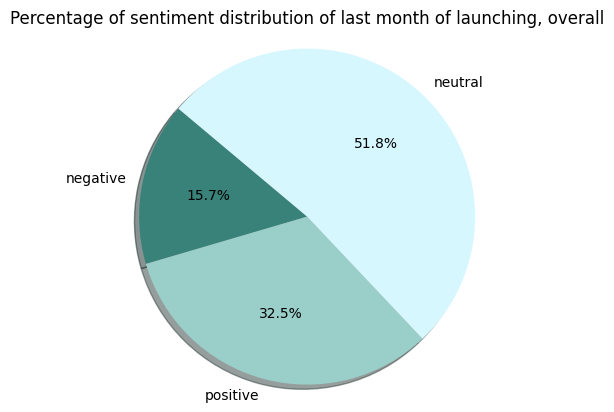

In [ ]:
#plot the proportion of sentiments
import matplotlib.pyplot as plt 

labels = ['negative', 'positive', 'neutral']
sizes = [len(negatives), len(positives), len(neutrals)]
colors = ['#39827a', '#9acfc9', '#d7f7ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution of last month of launching, overall')
plt.show()

## Analysis per week

In [ ]:
week1_val = week1.groupby("label").size().sort_values(ascending=False).tolist()
week1.groupby("label").size().sort_values(ascending=False)

label
neutral     1391
positive     825
negative     777
dtype: int64

In [ ]:
week2_val = week2.groupby("label").size().sort_values(ascending=False).tolist()
week2.groupby("label").size().sort_values(ascending=False)

label
neutral     11133
positive     6932
negative     3949
dtype: int64

In [ ]:
week3_val = week3.groupby("label").size().sort_values(ascending=False).tolist()
week3.groupby("label").size().sort_values(ascending=False)

label
neutral     12689
positive     7461
negative     3290
dtype: int64

In [ ]:
week4_val = week4.groupby("label").size().sort_values(ascending=False).tolist()
week4.groupby("label").size().sort_values(ascending=False)

label
neutral     8122
positive    5455
negative    2367
dtype: int64

In [ ]:
week5_val = week5.groupby("label").size().sort_values(ascending=False).tolist()
week5.groupby("label").size().sort_values(ascending=False)

label
neutral     5099
positive    3422
negative    1224
dtype: int64

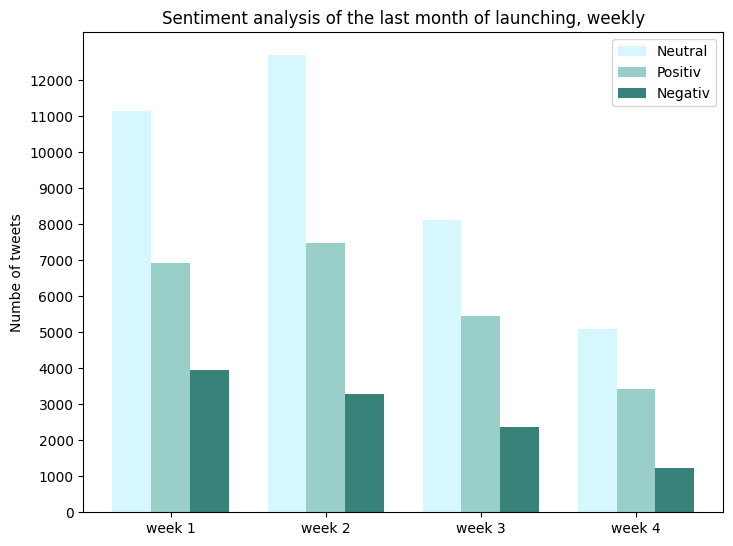

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [[week2_val[0], week3_val[0], week4_val[0], week5_val[0]], #neutral
  [week2_val[1], week3_val[1], week4_val[1], week5_val[1]], #positiv
  [week2_val[2], week3_val[2], week4_val[2], week5_val[2]]] #negativ
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.25, data[0], color = '#d7f7ff', width = 0.25)
ax.bar(X , data[1], color = '#9acfc9', width = 0.25)
ax.bar(X + 0.25, data[2], color = '#39827a', width = 0.25)
ax.set_ylabel('Numbe of tweets')
ax.set_title('Sentiment analysis of the last month of launching, weekly')
ax.set_xticks(X, ('week 1', 'week 2', 'week 3', 'week 4'))
ax.set_yticks(np.arange(0, 13000, 1000))
ax.legend(labels=['Neutral', 'Positiv', 'Negativ'])
plt.show()


# Word frequecy analysis

In [ ]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet_positiv = [tweet.lower().split() for tweet in positives.clean_tweets]
words_in_tweet_negativ = [tweet.lower().split() for tweet in negatives.clean_tweets]

print(words_in_tweet_positiv[:2])
print(words_in_tweet_negativ[:2])

[['day', 'ago', 'started', 'blog', 'chatgpt', 'ive', 'hit', 'view', 'read', 'let', 'momentum', 'going', 'check', 'latest', 'post', 'medium', 'join', 'conversation', 'blogging', 'contentcreation', 'chatgpt'], ['forbes', 'article', 'brief', 'microsofts', 'nuanceinc', 'expressed', 'commitment', 'increasing', 'driven', 'innovation', 'announcing', 'dragon', 'ambient', 'experience', 'dax', 'express', 'workflowintegrated', 'fully', 'automated', 'clinicaldocumentation', 'application', 'chatgpt']]
[['italy', 'privacy', 'watchdog', 'said', 'blocked', 'controversial', 'robot', 'chatgpt', 'saying', 'artificial', 'intelligence', 'app', 'respect', 'user', 'data', 'verify', 'user', 'age'], ['sick', 'gpt', 'limit', 'getting', 'frustrated', 'point', 'anymore', 'gpt', 'doesnt', 'cut', 'far', 'mistake', 'repeated', 'error', 'worst', 'openai', 'happy', 'pay', 'limit', 'money', 'chatgpt']]


In [ ]:
words_in_tweet_positiv = positives.clean_tweets.str.split(' ').to_frame()
words_in_tweet_positiv = words_in_tweet_positiv.explode('clean_tweets')

words_in_tweet_negativ = negatives.clean_tweets.str.split(' ').to_frame()
words_in_tweet_negativ = words_in_tweet_negativ.explode('clean_tweets')

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

words_in_tweet_positiv.clean_tweets = words_in_tweet_positiv.clean_tweets.apply(lambda x: lemmatizer.lemmatize(x))
words_in_tweet_negativ.clean_tweets = words_in_tweet_negativ.clean_tweets.apply(lambda x: lemmatizer.lemmatize(x))

In [ ]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
words_in_tweet_positiv = words_in_tweet_positiv.loc[~words_in_tweet_positiv.clean_tweets.isin(stops)]
words_in_tweet_negativ = words_in_tweet_negativ.loc[~words_in_tweet_negativ.clean_tweets.isin(stops)]

In [ ]:
words_in_tweet_positiv = words_in_tweet_positiv.reset_index()

p100 = words_in_tweet_positiv.size
p90 = p100 * 0.9
words_in_tweet_positiv = words_in_tweet_positiv.groupby('clean_tweets')['index'].agg(['unique']).reset_index()
words_in_tweet_positiv = words_in_tweet_positiv.loc[words_in_tweet_positiv.unique.map(len) > 10]
words_in_tweet_positiv = words_in_tweet_positiv.loc[words_in_tweet_positiv.unique.map(len) < p90]
words_in_tweet_positiv['occurence'] = words_in_tweet_positiv.unique.map(len)
words_in_tweet_positiv = words_in_tweet_positiv[['clean_tweets','occurence']]

In [ ]:
words_in_tweet_positiv.sort_values(by='occurence', ascending=False).head(5)

,clean_tweets,occurence
5610,chatgpt,22803
13734,gpt,3591
22796,openai,2507
21741,new,2212
18584,like,2074


In [ ]:
words_in_tweet_negativ = words_in_tweet_negativ.reset_index()

p100 = words_in_tweet_negativ.size
p90 = p100 * 0.9
words_in_tweet_negativ = words_in_tweet_negativ.groupby('clean_tweets')['index'].agg(['unique']).reset_index()
words_in_tweet_negativ = words_in_tweet_negativ.loc[words_in_tweet_negativ.unique.map(len) > 10]
words_in_tweet_negativ = words_in_tweet_negativ.loc[words_in_tweet_negativ.unique.map(len) < p90]
words_in_tweet_negativ['occurence'] = words_in_tweet_negativ.unique.map(len)
words_in_tweet_negativ = words_in_tweet_negativ[['clean_tweets','occurence']]

In [ ]:
words_in_tweet_negativ.sort_values(by='occurence', ascending=False).head(5)

,clean_tweets,occurence
3395,chatgpt,11259
14045,openai,1439
8550,gpt,1011
11551,like,962
10434,italy,876


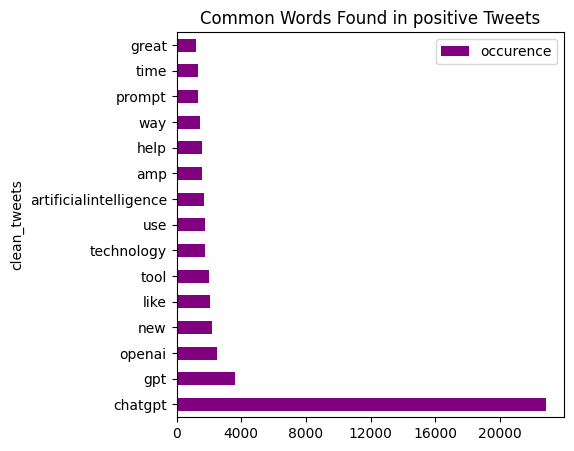

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot horizontal bar graph
words_in_tweet_positiv.sort_values(by='occurence', ascending=False).head(15).plot.barh(x='clean_tweets',
                      y='occurence',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in positive Tweets")
ax.set_xticks(np.arange(0, 24000, 4000))

plt.show()

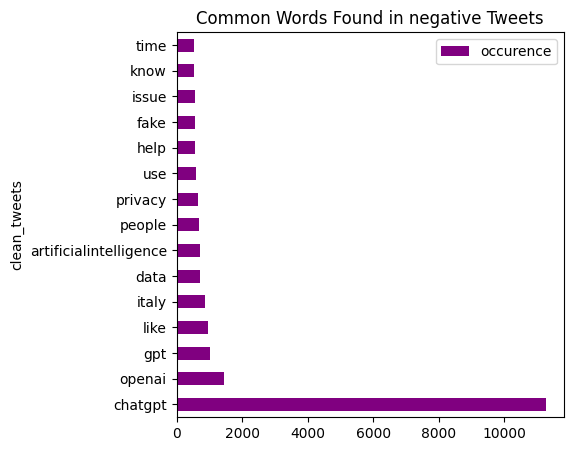

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot horizontal bar graph
words_in_tweet_negativ.sort_values(by='occurence', ascending=False).head(15).plot.barh(x='clean_tweets',
                      y='occurence',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in negative Tweets")
ax.set_xticks(np.arange(0, 12000, 2000))

plt.show()

### WordCloud

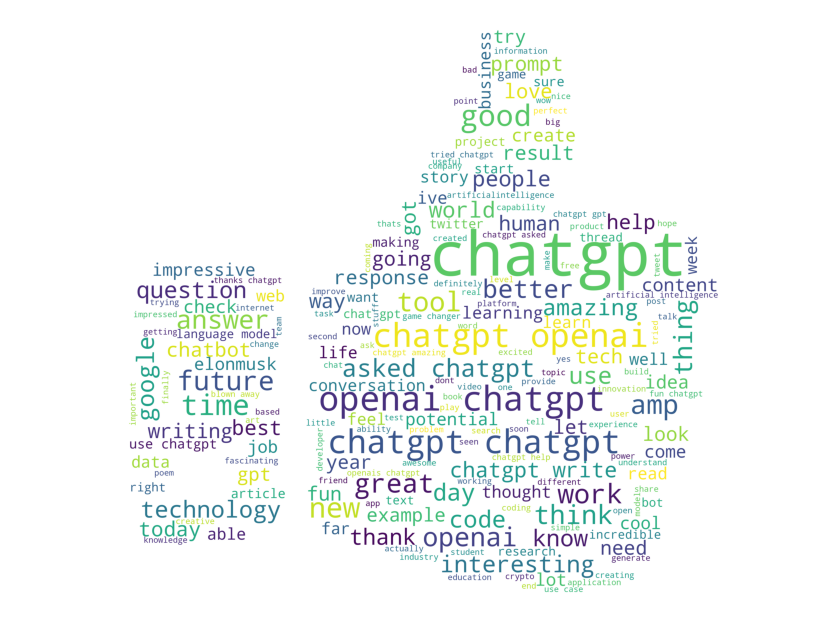

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
 
comment_words = ''
stopwords = set(STOPWORDS)

p = ", ".join(pos_all_words)

mask = np.array(Image.open("/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/wordcloud_images/upvote.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10, mask=mask).generate(p)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

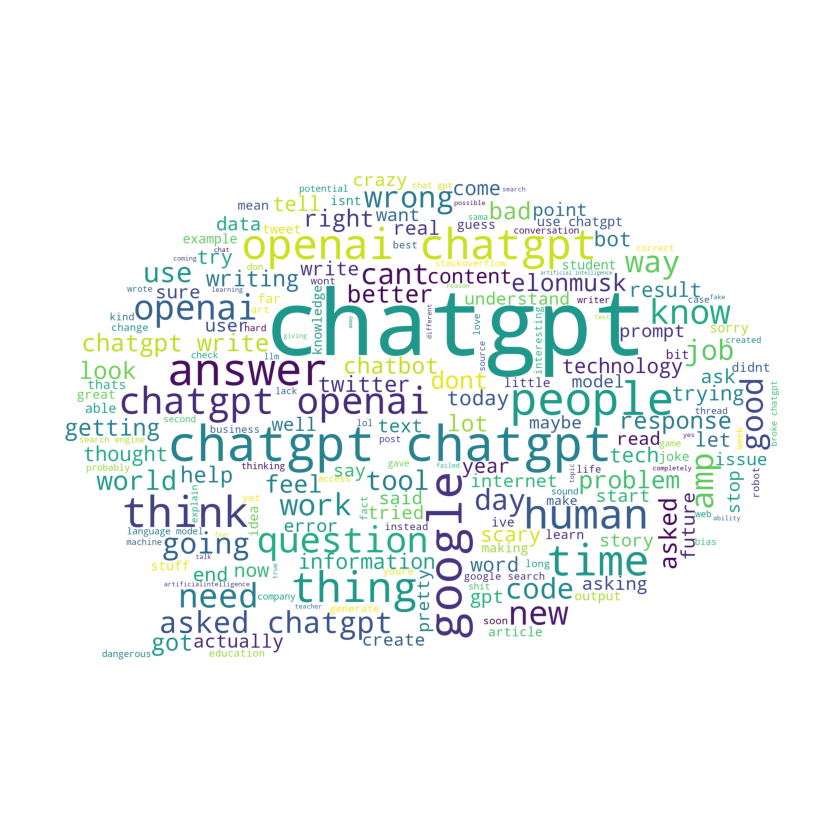

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
 
comment_words = ''
stopwords = set(STOPWORDS)

n = ", ".join(neg_all_words)
 
mask = np.array(Image.open("/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/wordcloud_images/comment.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, mask=mask).generate(n)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()